In [2]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 37.0 MB/s eta 0:00:0000:0100:01


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import cv2
import mediapipe as mp
import os

import keras
from keras.layers import Dense
from keras.models import Sequential
import random

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
BASE_PATH = r"/kaggle/input/asl-alphabet/"
trainDir = f"{BASE_PATH}asl_alphabet_train/asl_alphabet_train/"
testDir = f"{BASE_PATH}asl_alphabet_test/asl_alphabet_test/"

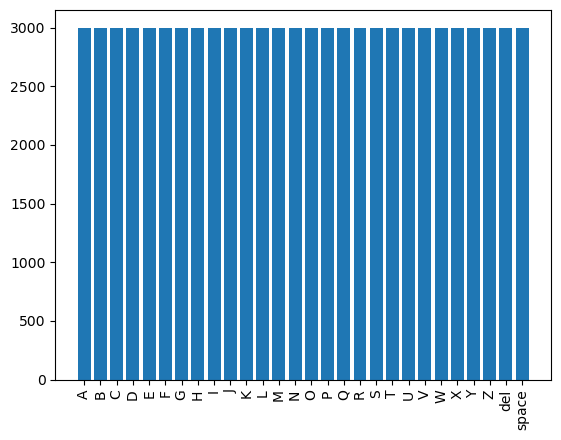

In [5]:
classes = np.sort(os.listdir(trainDir))
n_class = np.delete(classes, 27)
file_count = []

for cls in n_class:
    file_count.append(len(os.listdir(trainDir + "/" + cls)))


plt.bar(n_class, file_count)
plt.xticks(n_class, rotation='vertical')
plt.show()

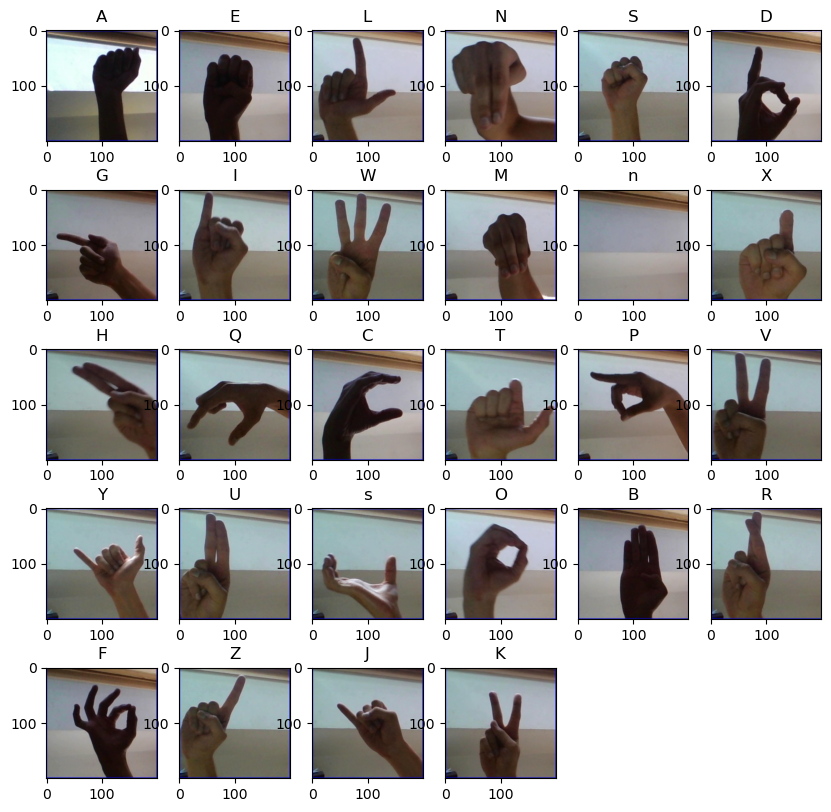

In [6]:
test_imgs = os.listdir(testDir)

plt.figure(figsize=(10, 10))
for i in range(len(test_imgs)):
    plt.subplot(5, 6, i+1)
    img = plt.imread(testDir + "/" + test_imgs[i])
    plt.imshow(img)
    plt.title(test_imgs[i][0])

In [7]:
mpHands = mp.solutions.hands
handsModel = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.5)
mpDraw = mp.solutions.drawing_utils
mpDrawingStyle = mp.solutions.drawing_styles

In [32]:
def processImg(img):
    lmsList = []
    img = cv2.imread(testDir + "/" + test_imgs[0])
    result = handsModel.process(img)

    if(result.multi_hand_landmarks):
        handLms = result.multi_hand_landmarks[0]
        for id, lm in enumerate(handLms.landmark):
            lmsList.append(lm.x)
            lmsList.append(lm.y)
        mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS, mpDrawingStyle.get_default_hand_landmarks_style, mpDrawingStyle.get_default_hand_connections_style)
        plt.imshow(img)
    return lmsList
img = cv2.imread(f'{testDir}/{test_imgs[0]}')
sampleData = processImg(img)
print(sampleData)

[]


In [9]:
trainDataLst = []
label = []
count = 0
lostImgsCnt = 0
lostImgs = []
for cls in n_class:
    imgs = os.listdir(trainDir+ '/' + cls)
    for img in imgs:
        imgPath = plt.imread(f"{trainDir}/{cls}/{img}")
        lms = []
        result = handsModel.process(imgPath)

        if(result.multi_hand_landmarks):
            handLms = result.multi_hand_landmarks[0]
            for lm in handLms.landmark:
                lms.append(lm.x)
                lms.append(lm.y)
        if(len(lms) != 0):
            trainDataLst.append(lms)
            label.append(cls)
        else:
            lostImgsCnt+=1
            lostImgs.append([img, cls])
    count+=1
    print(count)
len(trainDataLst), lostImgsCnt

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


(53156, 30844)

A


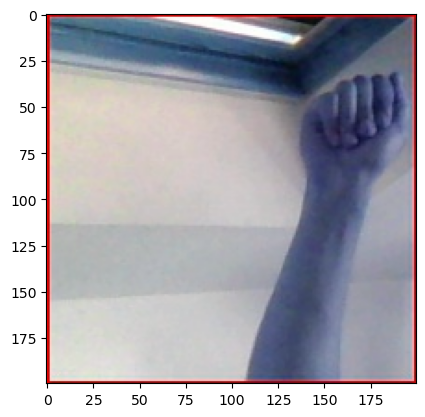

In [37]:
############################
print(lostImgs[0][1])
img = cv2.imread(trainDir + "/" + lostImgs[0][1] + "/" + lostImgs[0][0])
result = handsModel.process(img)

if(result.multi_hand_landmarks):
    handLms = result.multi_hand_landmarks[0]
    for id, lm in enumerate(handLms.landmark):
        lmsList.append(lm.x)
        lmsList.append(lm.y)
    mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS, mpDrawingStyle.get_default_hand_landmarks_style, mpDrawingStyle.get_default_hand_connections_style)
plt.imshow(img)

In [10]:
trainDataLst = np.array(trainDataLst)
label = np.array(label)

import random
index = np.arange(len(trainDataLst))

random.seed(5)
random.shuffle(index)

trainDataLst = trainDataLst[index]
label = label[index]
print(len(index))

53156


In [18]:
data = pd.DataFrame(trainDataLst)
lab = pd.DataFrame(label)

data.to_csv("/kaggle/working/data.csv")
lab.to_csv("/kaggle/working/label.csv")

In [47]:
# lab
pd.value_counts(lab[0])

L        2503
F        2405
D        2355
H        2237
K        2187
Z        2180
I        2113
J        2084
T        2071
E        2058
R        2050
B        1992
V        1929
W        1919
G        1909
X        1900
O        1895
S        1869
Y        1856
P        1830
C        1829
U        1829
A        1766
Q        1615
space    1307
M        1220
del      1212
N        1036
Name: 0, dtype: int64

In [11]:
labelDict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12,
       'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'space': 27}

In [12]:
labelNums = []

for ch in label:
    labelNums.append(labelDict[ch])

data = np.array(labelNums)
data = np.reshape(data, [-1, 1])
data = np.concatenate((trainDataLst, data), axis = 1)

yTrain = keras.utils.to_categorical(labelNums)

columns = ['0x', '0y', '1x', '1y', '2x', '2y', '3x', '3y', '4x', '4y', '5x', '5y', '6x', '6y', '7x', '7y', '8x', '8y', '9x', '9y', '10x', '10y', '11x', '11y', '12x', '12y', '13x', '13y', '14x', '14y', '15x', '15y', '16x', '16y', '17x', '17y', '18x', '18y', '19x', '19y', '20x', '20y', 'label']
trainData = pd.DataFrame(data, columns = columns)

trainData.to_csv("trainData.csv")
trainData.head()

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,label
0,0.554581,0.829181,0.621409,0.648048,0.653315,0.518776,0.690121,0.428018,0.740274,0.348705,...,0.296865,0.564174,0.475574,0.597073,0.367506,0.657877,0.337692,0.695825,0.343348,3.0
1,0.732602,0.699690,0.769277,0.618737,0.715808,0.527998,0.622406,0.507942,0.538837,0.514540,...,0.597151,0.554509,0.653023,0.553059,0.621772,0.627519,0.643469,0.678266,0.659207,7.0
2,0.360127,0.971485,0.505470,0.930969,0.623079,0.797071,0.671097,0.659636,0.716280,0.551848,...,0.846327,0.234721,0.682705,0.169495,0.594268,0.096804,0.571251,0.035941,0.549569,24.0
3,0.256940,0.609988,0.362354,0.623729,0.476249,0.580185,0.533467,0.490950,0.552612,0.416609,...,0.482393,0.234591,0.410543,0.237012,0.365418,0.231162,0.441817,0.232481,0.478691,19.0
4,0.566118,0.991616,0.661685,0.832808,0.698619,0.647665,0.743391,0.517236,0.770699,0.405547,...,0.158021,0.629432,0.580498,0.651747,0.417318,0.678544,0.323907,0.705897,0.247594,3.0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainDataLst, yTrain, test_size=0.3, random_state=42)

In [14]:
ASLmodel = Sequential()
ASLmodel.add(Dense(units=256, activation='relu', input_dim=42))
ASLmodel.add(Dense(units=512, activation='relu'))
ASLmodel.add(Dense(units=1024, activation='relu'))
ASLmodel.add(Dense(units=512, activation='relu'))
ASLmodel.add(Dense(units=28, activation='sigmoid'))

In [15]:
ASLmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
ASLmodel.fit(X_train, y_train, epochs=20, batch_size=100, validation_split = 0.2)

Epoch 1/20
298/298 [==============================] - 6s 15ms/step - loss: 0.9527 - accuracy: 0.7205 - val_loss: 0.4426 - val_accuracy: 0.8699
Epoch 2/20
298/298 [==============================] - 4s 15ms/step - loss: 0.4014 - accuracy: 0.8776 - val_loss: 0.3852 - val_accuracy: 0.8828
Epoch 3/20
298/298 [==============================] - 5s 16ms/step - loss: 0.3310 - accuracy: 0.8983 - val_loss: 0.2676 - val_accuracy: 0.9172
Epoch 4/20
298/298 [==============================] - 4s 15ms/step - loss: 0.2916 - accuracy: 0.9079 - val_loss: 0.2870 - val_accuracy: 0.9176
Epoch 5/20
298/298 [==============================] - 4s 15ms/step - loss: 0.2621 - accuracy: 0.9177 - val_loss: 0.2773 - val_accuracy: 0.9113
Epoch 6/20
298/298 [==============================] - 4s 15ms/step - loss: 0.2471 - accuracy: 0.9219 - val_loss: 0.2241 - val_accuracy: 0.9324
Epoch 7/20
298/298 [==============================] - 4s 14ms/step - loss: 0.2236 - accuracy: 0.9289 - val_loss: 0.2717 - val_accuracy: 0.9139

In [17]:
# ASLmodel.save('/kaggle/working/ASLmodel.h5')
ASLmodel.evaluate(X_test, y_test)

499/499 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.9555


[0.1563381850719452, 0.9554775357246399]

In [19]:
ASLmodel.save('/kaggle/working/ASLmodelF.h5')

# Testing The Model
- Dataset - synthetic-asl-alphabet

In [ ]:
from IPython.display import clear_output

In [ ]:
# tDir = r'/kaggle/input/synthetic-asl-alphabet/Test_Alphabet'
# testClass = np.delete(n_class, (26, 27))
# testDataLst = []
# testLabels = []
# count = 0
# cc = 0
# for cls in testClass:
#     imgs = os.listdir(tDir+ '/' + cls)
#     for img in imgs:
#         imgPath = cv2.imread(f"{tDir}/{cls}/{img}")
#         lms = []
#         result = handsModel.process(imgPath)

#         if(result.multi_hand_landmarks):
#             handLms = result.multi_hand_landmarks[0]
#             for lm in handLms.landmark:
#                 lms.append(lm.x)
#                 lms.append(lm.y)
#         if(len(lms) != 0):
#             testDataLst.append(lms)
#             testLabels.append(cls)
#         else:
#             cc += 1
#     count+=1
#     clear_output()
#     print('No of Directries Completed: ', count)

# len(testDataLst), len(testLabels), cc

In [ ]:
# testDataLst = np.array(testDataLst)
# testLabels = np.array(testLabels)

# # index = np.arange(len(testDataLst))

# # random.seed(5)
# # random.shuffle(index)

# # testDataLst = testDataLst[index]
# # testLabels = testLabels[index]

# labelNumsT = []

# for ch in testLabels:
#     labelNumsT.append(labelDict[ch])

# y_test = keras.utils.to_categorical(labelNumsT, num_classes = 28)

# testDataLst.shape, testLabels.shape, len(index), y_test.shape

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/kaggle/input/ASLmodel/ASLmodel.h5')

In [ ]:
new_model.evaluate(testDataLst, y_test)